In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("Ecommerce Customers.csv")
df = df[["Avg. Session Length", "Time on App",
         "Time on Website", "Length of Membership",
         "Yearly Amount Spent"]].dropna().sort_values(by="Length of Membership")

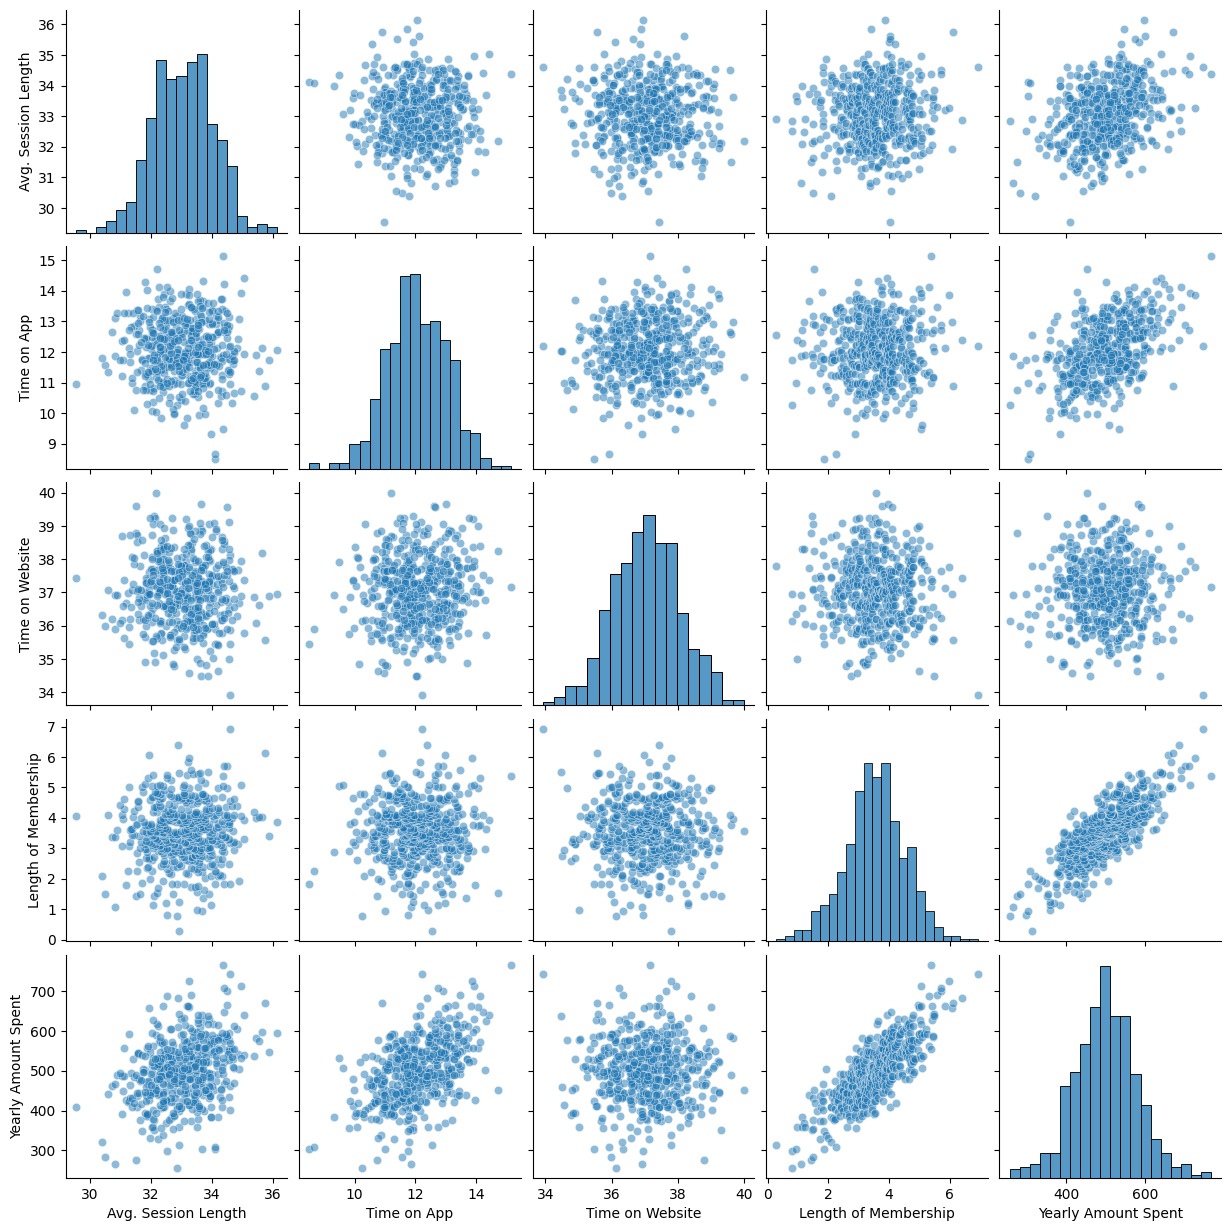

In [72]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha": 0.5})

In [86]:
X = pd.DataFrame(df[["Length of Membership", "Time on App"]])
y = pd.DataFrame(df["Yearly Amount Spent"])

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1/2,
                                                    random_state=42,
                                                    shuffle=True)

In [97]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [98]:
y_test_pred = regressor.predict(X_test)

Text(0, 0.5, 'Predicted Yearly Amount Spent')

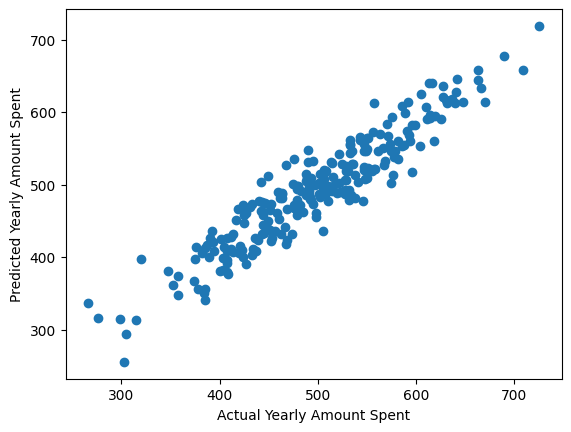

In [95]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")

In [100]:
df["Predicted Yearly Amount Spent"] = regressor.predict(X)
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Predicted Yearly Amount Spent
447,32.904854,12.556108,37.805509,0.269901,314.438518,312.507403
225,32.836941,10.256549,36.143908,0.789520,256.670582,256.804636
173,32.529769,11.747732,36.939882,0.801516,298.762008,314.721274
434,33.666616,10.985764,36.352503,0.936498,304.135592,293.940693
161,33.503705,12.399436,35.012806,0.968622,357.591439,350.143054
...,...,...,...,...,...,...
50,33.256335,13.858062,37.780265,5.976768,725.584814,718.870010
153,31.945396,12.965761,36.966389,6.076654,657.019924,690.900746
396,35.742670,10.889828,35.565436,6.115199,669.987141,613.723349
151,32.887105,12.387184,37.431159,6.401229,684.163431,688.992756


In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 23.416628004055916
Mean Squared Error: 817.0689775202233
R^2 Score: 0.8792268422227818


<Axes: ylabel='Count'>

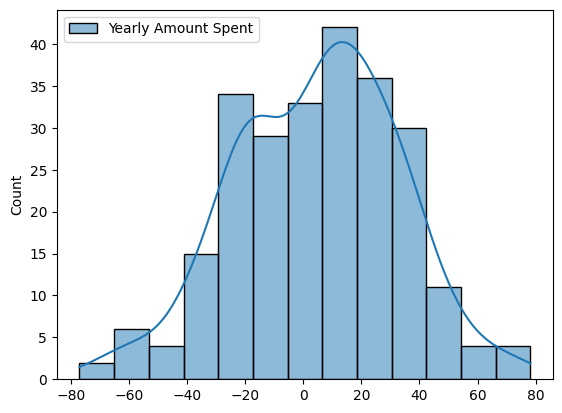

In [102]:
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True)

The model works efficiently, as it accounts for 87.9% of varience.